#**Python Code Implementation of t-SNE on MNIST Dataset**


#Step 1 :
##Importing Necessary Modules.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Step 2 :
## load the MNIST_test dataset into pandas dataframe

In [10]:
# Reading the data using pandas
df = pd.read_csv('mnist_test.csv')

# Print first five rows of df
print(df.head())


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [11]:
print( df.shape)

(10000, 785)


In [12]:
# Drop the label feature and
# store the pixel data in d.

labels = df['label']
d = df.drop(columns=['label'])


# Step 3  :
## Standardize the data

In [13]:
# Data-preprocessing: Standardizing the data
scaler = StandardScaler()
d_scaled = scaler.fit_transform(d)


# Step 4 :  Reduce the columns data to 2 dimensions




In [14]:
# Picking the top 1000 points as TSNE
# takes a lot of time for 15K points
d_scaled_sample = d_scaled[:1000]
labels_sample = labels[:1000]


In [15]:
# Assuming 'label' column exists in the original dataframe 'df'

# Extract labels from the original dataframe

labels = df['label']


# Step 5 :
## define the model

In [16]:


# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)



# Step 6 :
## Fit the model

In [17]:

# creating a new data frame which
# help us in plotting the result data

d_tsne = tsne.fit_transform(d_scaled_sample)





# Step 7 :
##  Plotting the result

In [18]:
# Plotting the result of tsne
tsne_df = pd.DataFrame(d_tsne, columns=['Component 1', 'Component 2'])
tsne_df['label'] = labels_sample.values


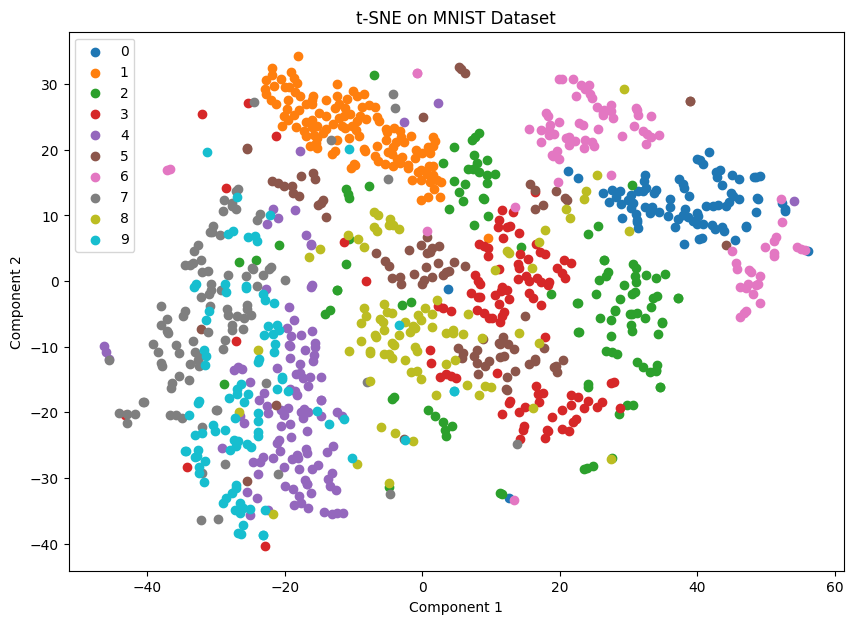

In [19]:
plt.figure(figsize=(10, 7))
for label in np.unique(tsne_df['label']):
    subset = tsne_df[tsne_df['label'] == label]
    plt.scatter(subset['Component 1'], subset['Component 2'], label=label)
plt.title('t-SNE on MNIST Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# 3D

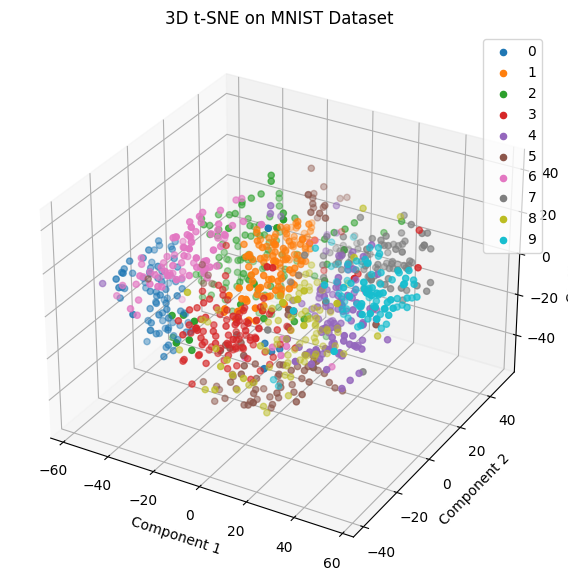

In [20]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
#-------------------------------------------------------
df = pd.read_csv('/content/mnist_test.csv')
labels = df['label']
d = df.drop(columns=['label'])
scaler = StandardScaler()
d_scaled = scaler.fit_transform(d)
d_scaled_sample = d_scaled[:1000]
labels_sample = labels[:1000]
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000)
d_tsne = tsne.fit_transform(d_scaled_sample)

# ـ--------------------------
tsne_df = pd.DataFrame(d_tsne, columns=['Component 1', 'Component 2', 'Component 3'])
tsne_df['label'] = labels_sample.values

# Plotting the result in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(tsne_df['label']):
    subset = tsne_df[tsne_df['label'] == label]
    ax.scatter(subset['Component 1'], subset['Component 2'], subset['Component 3'], label=label)
ax.set_title('3D t-SNE on MNIST Dataset')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.show()


#**Well Done**